# What made you happy? An analysis of common actions linked to happy moments (Pt. 2)

In this script, we present visualizations of the actions taken by people to be happy (self-described; an analysis of HappyDB corpus)

*A disclaimer: As the purpose of this project was to extract actions taken in form of phrases, the frequency count (a common metric in textual analyses) is weaker than usual. In ideal cases, 'action' level data would be further contextualized and studied to causally link actions to happiness.*

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()

Saving final_df.csv to final_df.csv


In [5]:
import pandas as pd
data = pd.read_csv('/content/final_df.csv')


In [6]:
data.head() # check data

,Unnamed: 0,hmid,Root_Object_Phrase,Sentence,cleaned_hm,Starts with I or Verb,wid,reflection_period,predicted_category,age,country,gender,marital,parenthood
0,0.0,100000,bought - earrings,I bought cute earrings,I bought cute earrings,Yes,884.0,3m,achievement,22.0,USA,f,married,n
1,1.0,100004,made - plans,I made plans to meet up with a girl I like.,I made plans to meet up with a girl I like.,Yes,2905.0,3m,affection,20.0,USA,m,single,n
2,2.0,100006,found - clothes,I found some new clothes that were on sale and...,I found some new clothes that were on sale and...,Yes,340.0,3m,achievement,43,USA,f,married,y
3,3.0,100008,had - visit - with - him,I got to see my brother for the first time in ...,I got to see my brother for the first time in ...,Yes,271.0,3m,affection,36.0,USA,m,married,y
4,4.0,100008,had - visit - with - him,I had a good visit with him.,I got to see my brother for the first time in ...,Yes,271.0,3m,affection,36.0,USA,m,married,y


In [7]:
# Rename variable 'Root_Object_Phrase' to 'action_phrase'

data.rename(columns={'Root_Object_Phrase': 'action_phrase'}, inplace=True)

# Add frequency of 'action_phrases' to the dataframe
phrase_frequency = data['action_phrase'].value_counts()

# Map the frequency to the DataFrame
data['Frequency'] = data['action_phrase'].map(phrase_frequency)

Our dataframe is ready for visual analyses.

## What actions are most commonly seen in reflections of happy moments?
We'll start with some word clouds for different groups.

(-0.5, 399.5, 199.5, -0.5)

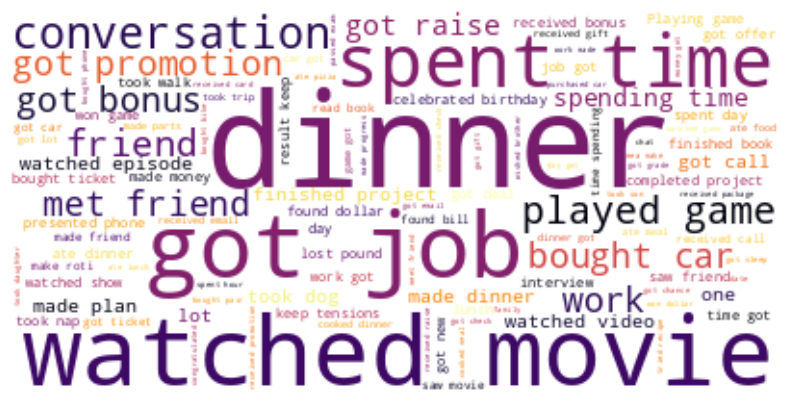

In [10]:
# Combine 'action_phrase' into a single string
phrases_text = ' '.join(data['action_phrase'])

# Create a word cloud
wordcloud = WordCloud(collocation_threshold=2, # we use threshold '2' has those are the most commonly found patterns of actions in the dataset, and it's easier to visually interpret.
                      collocations=True,
                      background_color="white",
                      colormap="inferno").generate(phrases_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Looks like some common actions are:
* Watching movies
* Getting dinner or lunch
* Getting a job
* Conversations

... and so on! Now, we'll see how actions that cause happiness differ by gender.

#### Most common actions by gender

(-0.5, 399.5, 199.5, -0.5)

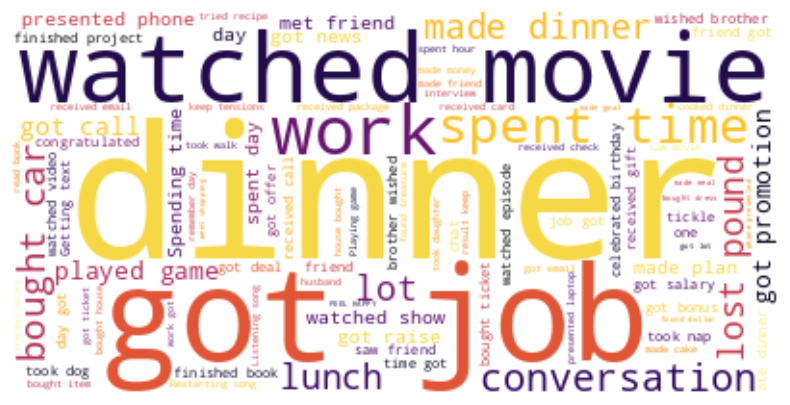

In [11]:
# Combine 'action_phrase' into a single string; filtered for female (gender = 'f')
phrases_text_female = ' '.join(data[data['gender'] == 'f']['action_phrase'])

# Create a word cloud
wordcloud = WordCloud(collocation_threshold=2,
                      collocations=True,
                      background_color="white",
                      colormap="inferno").generate(phrases_text_female)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

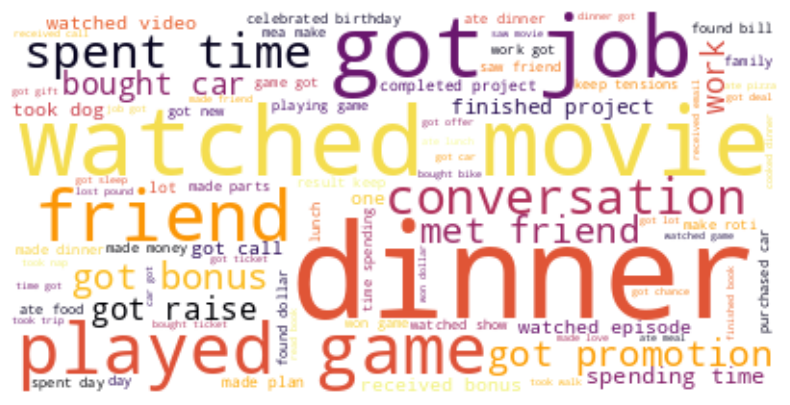

In [12]:
# Combine 'action_phrase' into a single string; filtered for male (gender = 'm')
phrases_text_male = ' '.join(data[data['gender'] == 'm']['action_phrase'])

# Create a word cloud
wordcloud = WordCloud(collocation_threshold=2,
                      collocations=True,
                      background_color="white",
                      colormap="inferno").generate(phrases_text_male)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### Most common actions by reflection period

That is, do the actions associated with happy moments differ depending on the time period of reflection?

(-0.5, 399.5, 199.5, -0.5)

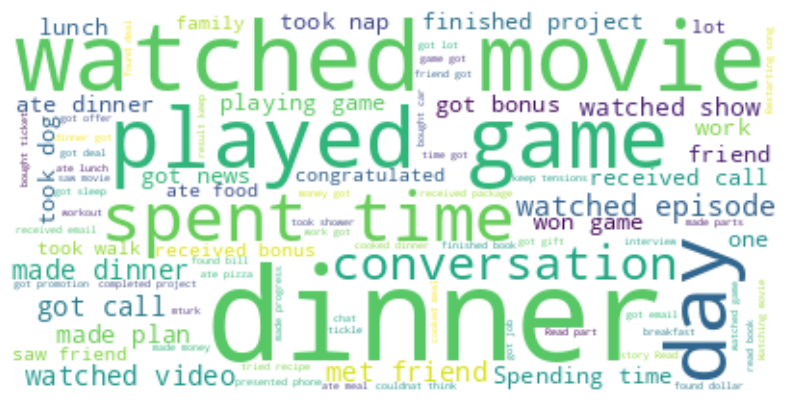

In [13]:
# Combine 'action_phrase' into a single string; filtered for short-period of reflection (24 hours)
phrases_text_24h = ' '.join(data[data['reflection_period'] == '24h']['action_phrase'])

# Create a word cloud
wordcloud = WordCloud(collocation_threshold=2,
                      collocations=True,
                      background_color="white",
                      colormap="viridis").generate(phrases_text_24h)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

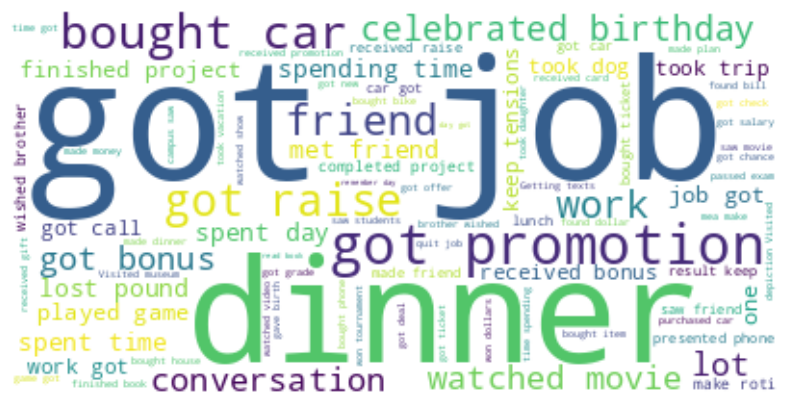

In [14]:
# Combine 'action_phrase' into a single string; filtered for longer-period of reflection (3 months)
phrases_text_3m = ' '.join(data[data['reflection_period'] == '3m']['action_phrase'])

# Create a word cloud
wordcloud = WordCloud(collocation_threshold=2,
                      collocations=True,
                      background_color="white",
                      colormap="viridis").generate(phrases_text_3m)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

We can see some differences starting to arise! In the short-term, focus is on immediate gratification such as watching video, playing game etc. In longer window, actions such as big purchases ('bought car'), got raise, promotion etc. seem to pop up more often.

# What are the most frequent actions seen in happy moments?


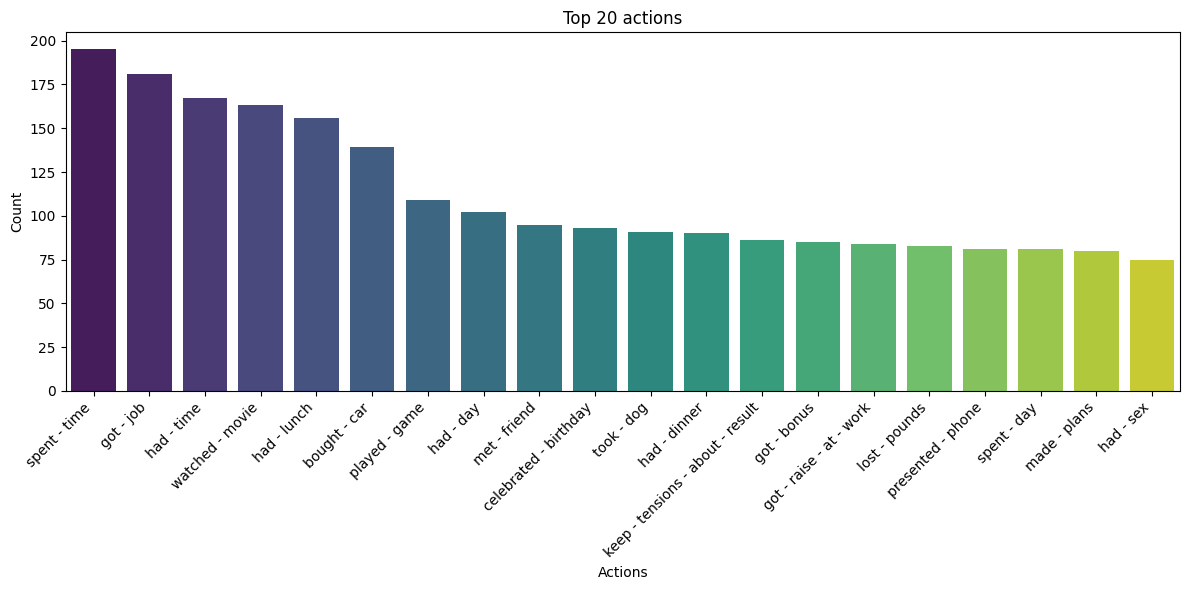

In [15]:
# Count the occurrences of each unique phrase in 'Root_Object_Phrase'
phrase_counts = data['action_phrase'].value_counts()

# Select the top 20 categories
top_20_phrases = phrase_counts.head(20)

# Plot a bar chart for the top 15 categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_phrases.index, y=top_20_phrases.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Actions')
plt.ylabel('Count')
plt.title('Top 20 actions')
plt.tight_layout()

As we can see, this is someone in line with what we saw in the word clouds. Most common actions are got job, watching movie, lunch/dinner etc. Some of the actions are ill-defined and need more contextual iformation (such as 'had time' - to do what is unclear).

In the next part, we'll explore the top 20 actions based on predicted category.

# What are the most common actions for each predicted category?

For example, what kind of actions are taken by people whose responses are categorized as 'affection' or 'bonding'?

*Keep in mind that predicted categories are pre-calculated with a certain degree of accuracy. Just because an action or 'moment' was categorized as a particular category, does not imply that the response absolutely belongs to that category. Further analysis is needed to find more accurate classifications*

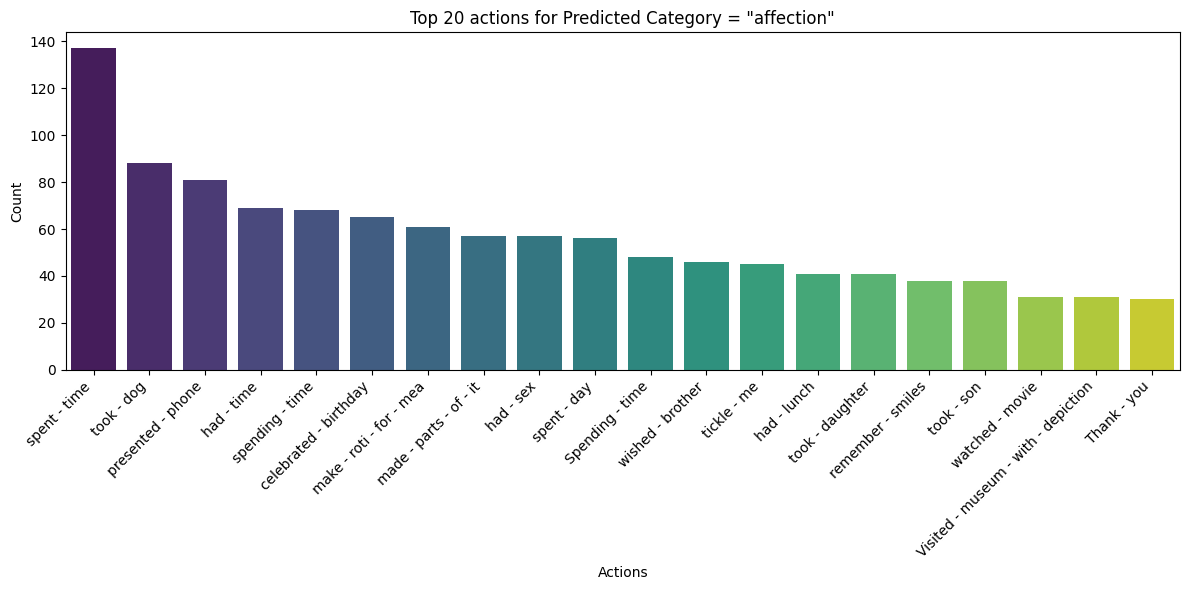

In [16]:
# Filter the data for predicted category = 'affection'
affection_data = data[data['predicted_category'] == 'affection']

phrase_counts = affection_data['action_phrase'].value_counts()

# Select the top 20 action phrases
top_20_phrases = phrase_counts.head(20)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_phrases.index, y=top_20_phrases.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Actions')
plt.ylabel('Count')
plt.title('Top 20 actions for Predicted Category = "affection"')
plt.tight_layout()

plt.show()


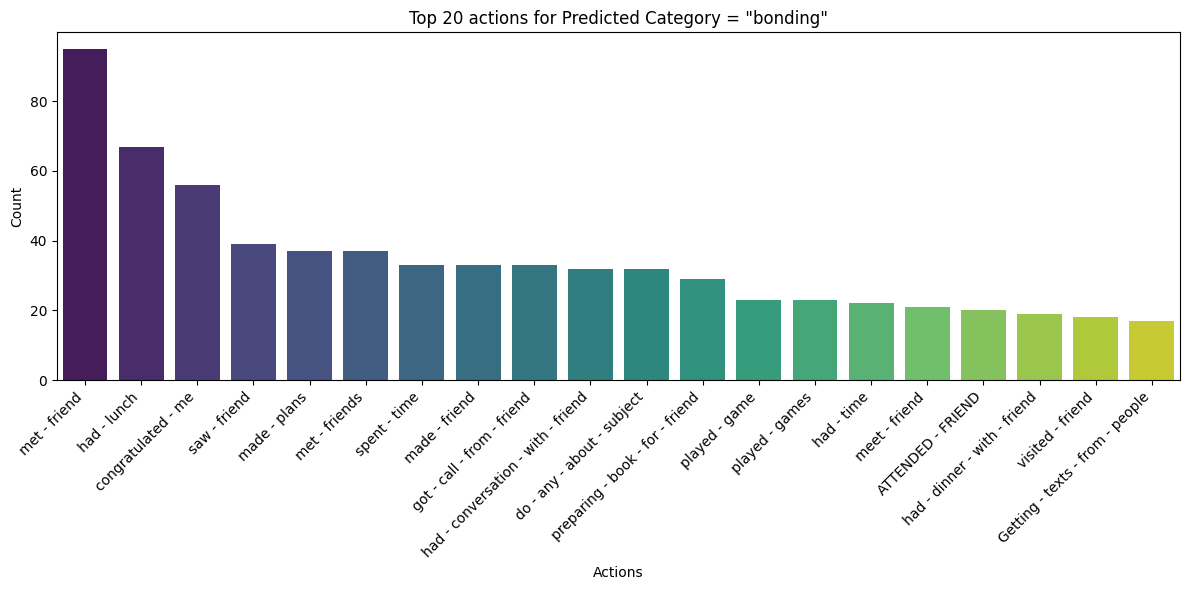

In [18]:
# Filter the data for predicted category = 'bonding'
bonding_data = data[data['predicted_category'] == 'bonding']

phrase_counts = bonding_data['action_phrase'].value_counts()

# Select the top 20 action phrases
top_20_phrases = phrase_counts.head(20)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_phrases.index, y=top_20_phrases.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Actions')
plt.ylabel('Count')
plt.title('Top 20 actions for Predicted Category = "bonding"')
plt.tight_layout()

plt.show()

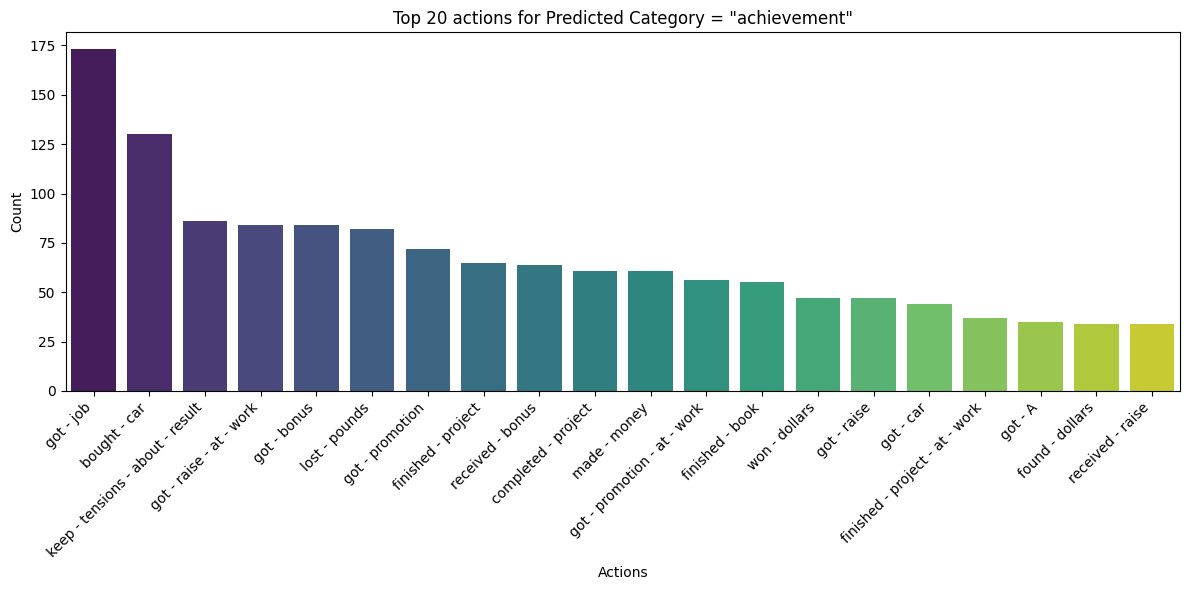

In [19]:
# Filter the data for predicted category = 'achievement'
achievement_data = data[data['predicted_category'] == 'achievement']

phrase_counts = achievement_data['action_phrase'].value_counts()

# Select the top 20 action phrases
top_20_phrases = phrase_counts.head(20)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_phrases.index, y=top_20_phrases.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Actions')
plt.ylabel('Count')
plt.title('Top 20 actions for Predicted Category = "achievement"')
plt.tight_layout()

plt.show()

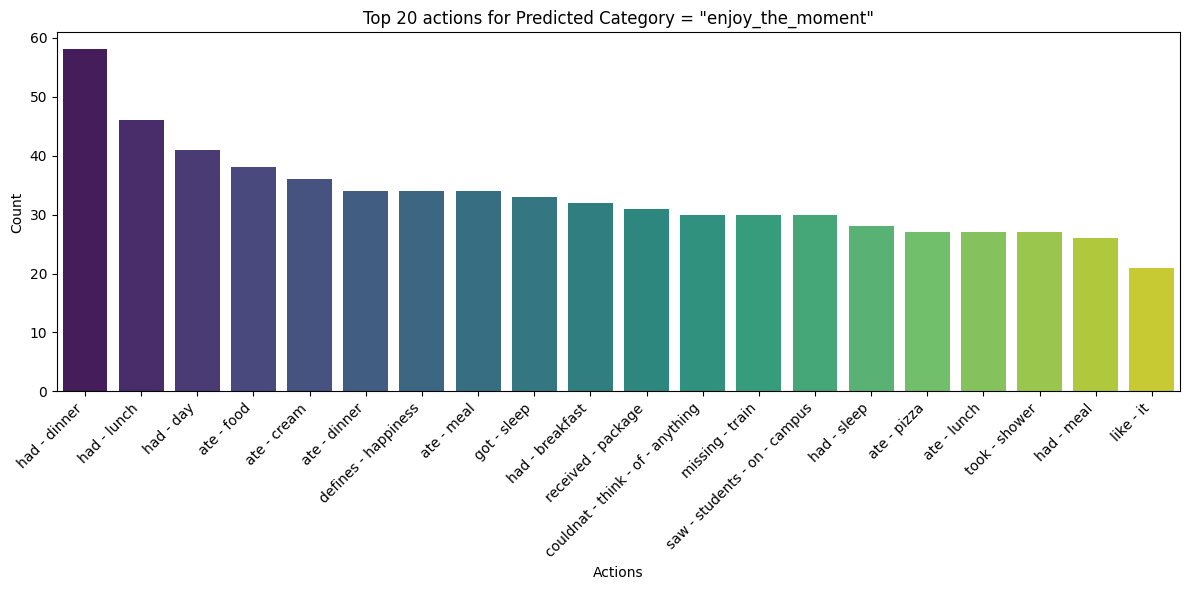

In [20]:
# Filter the data for predicted category = 'enjoy_the_moment'
enjoy_the_moment_data = data[data['predicted_category'] == 'enjoy_the_moment']

phrase_counts = enjoy_the_moment_data['action_phrase'].value_counts()

# Select the top 20 action phrases
top_20_phrases = phrase_counts.head(20)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_phrases.index, y=top_20_phrases.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Actions')
plt.ylabel('Count')
plt.title('Top 20 actions for Predicted Category = "enjoy_the_moment"')
plt.tight_layout()

plt.show()

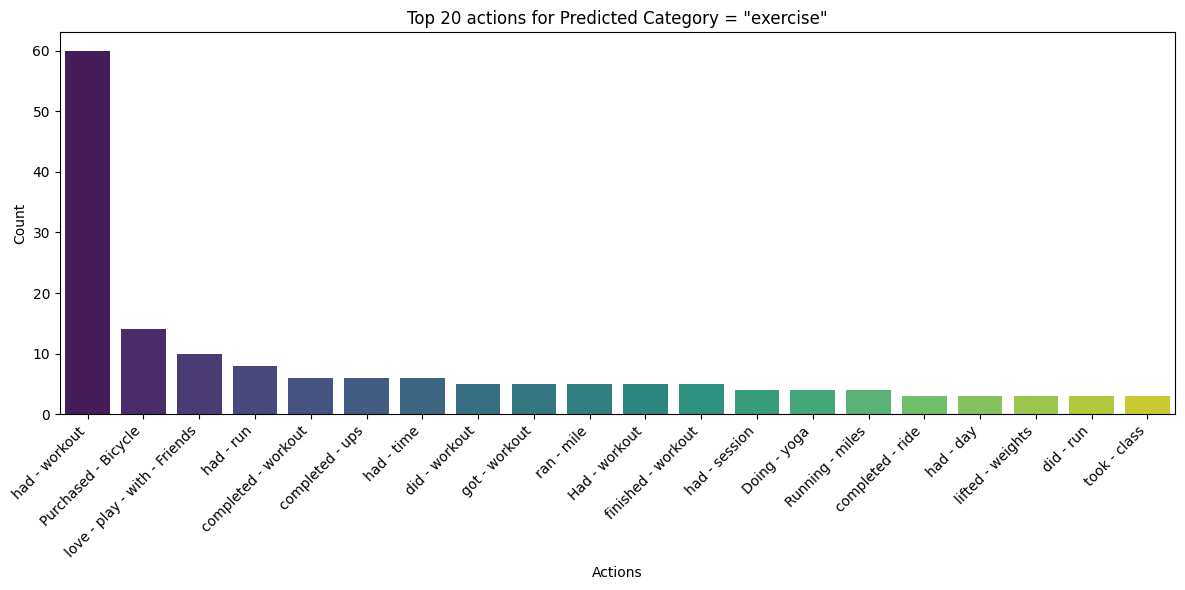

In [21]:
# Filter the data for predicted category = 'exercise'
exercise_data = data[data['predicted_category'] == 'exercise']

phrase_counts = exercise_data['action_phrase'].value_counts()

# Select the top 20 action phrases
top_20_phrases = phrase_counts.head(20)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_phrases.index, y=top_20_phrases.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Actions')
plt.ylabel('Count')
plt.title('Top 20 actions for Predicted Category = "exercise"')
plt.tight_layout()

plt.show()

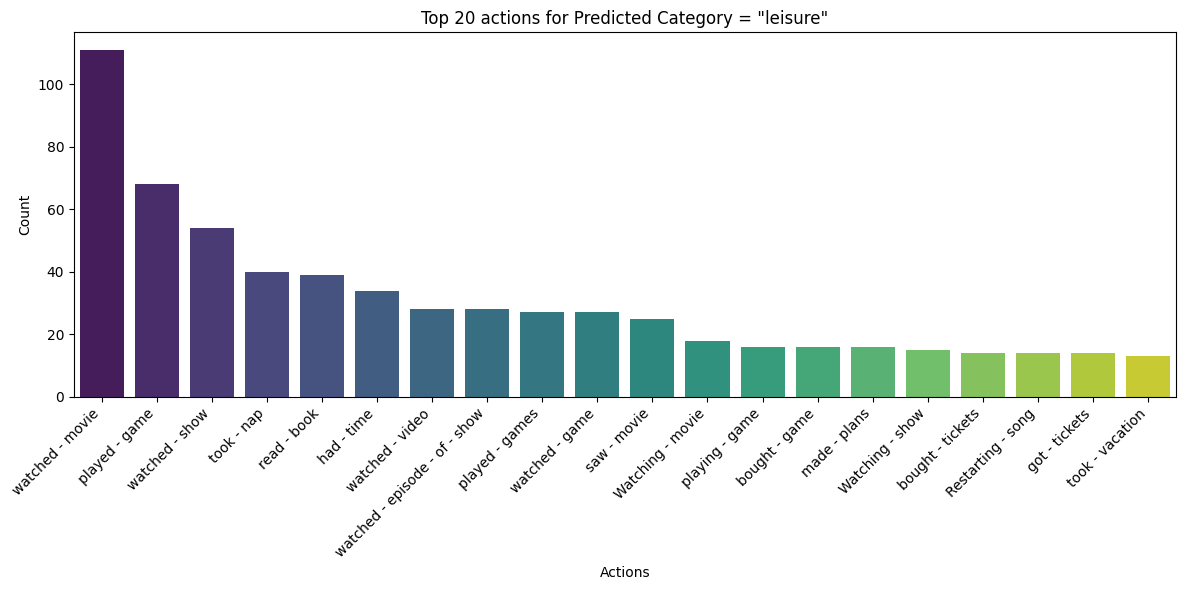

In [22]:
# Filter the data for predicted category = 'leisure'
leisure_data = data[data['predicted_category'] == 'leisure']

phrase_counts = leisure_data['action_phrase'].value_counts()

# Select the top 20 action phrases
top_20_phrases = phrase_counts.head(20)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_phrases.index, y=top_20_phrases.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Actions')
plt.ylabel('Count')
plt.title('Top 20 actions for Predicted Category = "leisure"')
plt.tight_layout()

plt.show()

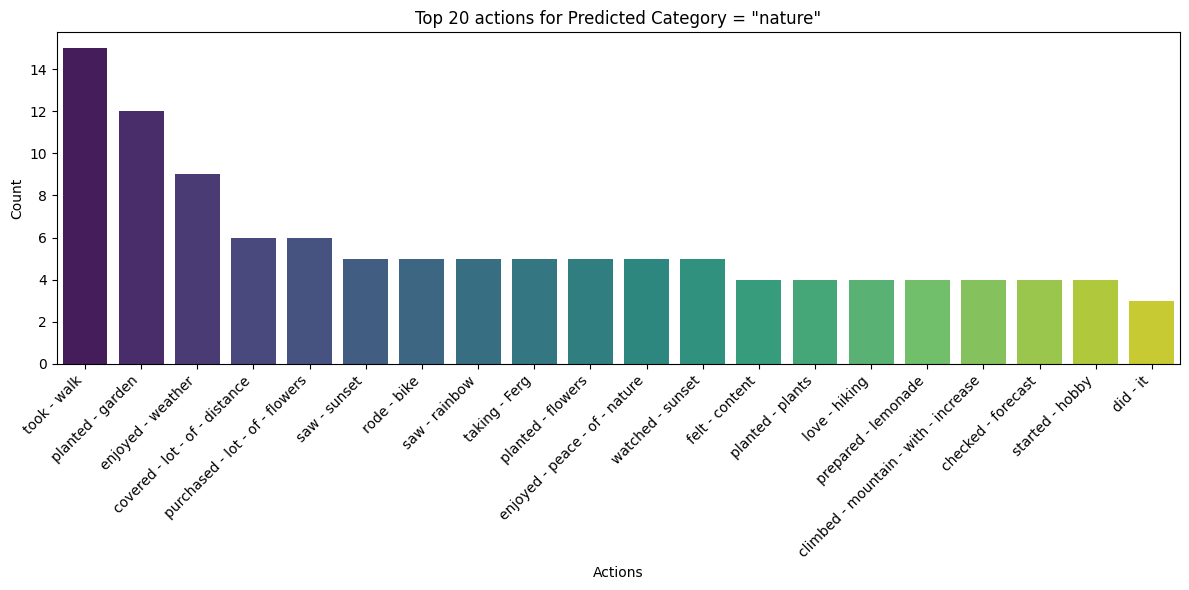

In [23]:
# Filter the data for predicted category = 'nature'
nature_data = data[data['predicted_category'] == 'nature']

phrase_counts = nature_data['action_phrase'].value_counts()

# Select the top 20 action phrases
top_20_phrases = phrase_counts.head(20)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_phrases.index, y=top_20_phrases.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Actions')
plt.ylabel('Count')
plt.title('Top 20 actions for Predicted Category = "nature"')
plt.tight_layout()

plt.show()